In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from net import *
from utils import *
from loss import *
warnings.filterwarnings('ignore')

## random

In [2]:
random_masks = np.mean(np.load("D:nyc_taxi/data_min_max/test_random_mask.npy"),axis=0)
biased_masks = np.mean(np.load("D:nyc_taxi/data_min_max/test_biased_mask.npy"),axis=0)

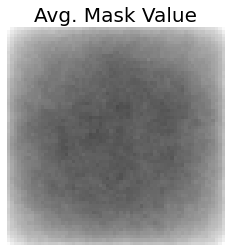

In [3]:
plt.imshow(random_masks, cmap='gray', vmin=0.6)
plt.axis('off')
plt.title('Avg. Mask Value', fontsize=20)
pass

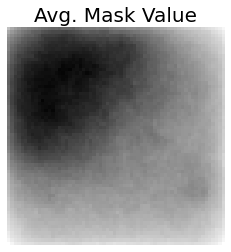

In [4]:
plt.imshow(biased_masks, cmap='gray',vmin=0.6)
plt.title('Avg. Mask Value', fontsize=20)
plt.axis('off')
pass

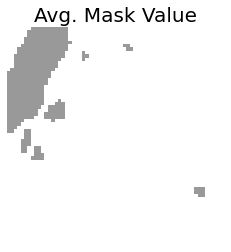

In [5]:
img = np.zeros((64,64))
img = np.load(f'D:/nyc_taxi/data_min_max/train.npy')[0]
blurred = cv2.GaussianBlur(img, (5,5), 0)
thresh = cv2.threshold(blurred, np.quantile(blurred.ravel(), 0.9), 1, cv2.THRESH_BINARY)[1]
plt.imshow(1-thresh, cmap='gist_gray',vmin=-1.5)
plt.title('Avg. Mask Value', fontsize=20)
plt.axis('off')
pass

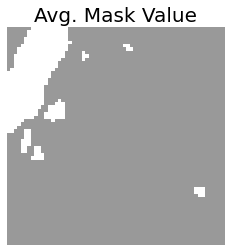

In [6]:
plt.imshow(thresh, cmap='gist_gray', vmin=-1.5)
plt.title('Avg. Mask Value', fontsize=20)
plt.axis('off')
pass

### Random Masking

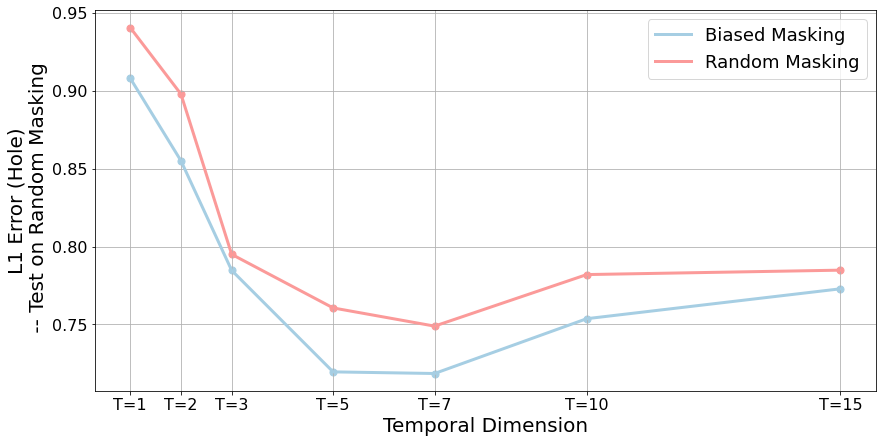

In [13]:
T = [1,2,3,5,7,10,15]
biased_l1 = []
biased_mape = []
random_l1 = []
random_mape = []
for i in T:
    random = np.load(f'../../results/chunk_size_{i}/random_0.npy')
    biased = np.load(f'../../results/chunk_size_{i}/biased_0.npy')
    
    random_l1.append(float(np.load(f'../../results/chunk_size_{i}/random_0.npy')[7]))
    biased_l1.append(float(np.load(f'../../results/chunk_size_{i}/biased_0.npy')[7]))

## visualization
color_palette = sns.color_palette('Paired')
dot_size = 50
x_tick_size = 16
y_tick_size = 16
legend_size = 18
label_size = 20
line_with = 3

## first plot
plt.figure(figsize=(14,7))
plt.scatter(T, biased_l1, color=color_palette.__getitem__(0),s=dot_size)
plt.plot(T, biased_l1, label='Biased Masking', color=color_palette.__getitem__(0), linewidth=line_with)

plt.scatter(T, random_l1, color=color_palette.__getitem__(4),s=dot_size)
plt.plot(T, random_l1, label='Random Masking', color=color_palette.__getitem__(4), linewidth=line_with)

plt.legend(fontsize=legend_size, loc=1)
plt.grid(True)

plt.ylabel('L1 Error (Hole)\n -- Test on Random Masking', size=label_size)
plt.xlabel('Temporal Dimension', size=label_size)
plt.xticks([1,2,3,5,7,10,15], ['T=1','T=2','T=3','T=5','T=7', 'T=10', 'T=15'],size=x_tick_size)
plt.yticks(size=y_tick_size)
pass    

4. black-white color

### Biased Masking

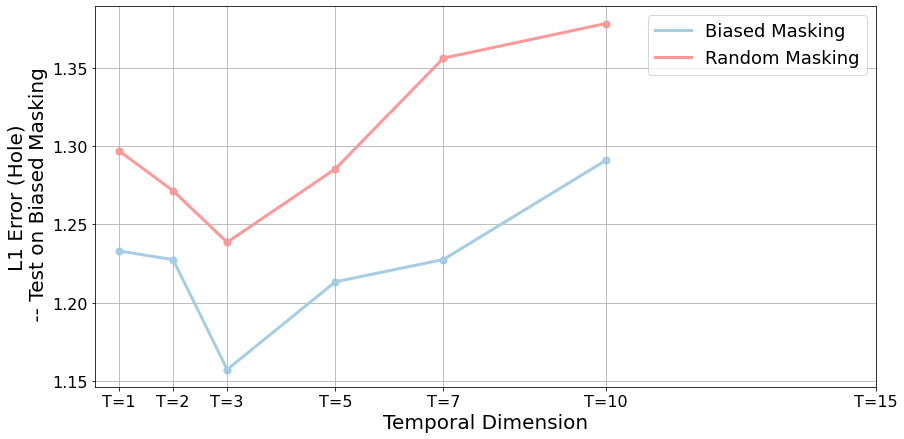

In [8]:
T = [1,2,3,5,7,10]
biased_l1 = []
biased_mape = []
random_l1 = []
random_mape = []
for i in T:
    random = np.load(f'../../results/chunk_size_{i}/random_0.npy')
    biased = np.load(f'../../results/chunk_size_{i}/biased_0.npy')
    
    random_l1.append(float(np.load(f'../../results/chunk_size_{i}/random_0.npy')[3]))
    biased_l1.append(float(np.load(f'../../results/chunk_size_{i}/biased_0.npy')[3]))

## visualization
color_palette = sns.color_palette('Paired')
dot_size = 50
x_tick_size = 16
y_tick_size = 16
legend_size = 18
label_size = 20
line_with = 3

## first plot
plt.figure(figsize=(14,7))
plt.scatter(T, biased_l1, color=color_palette.__getitem__(0),s=dot_size)
plt.plot(T, biased_l1, label='Biased Masking', color=color_palette.__getitem__(0), linewidth=line_with)

plt.scatter(T, random_l1, color=color_palette.__getitem__(4),s=dot_size)
plt.plot(T, random_l1, label='Random Masking', color=color_palette.__getitem__(4), linewidth=line_with)

plt.legend(fontsize=legend_size, loc=1)
plt.grid(True)

plt.ylabel('L1 Error (Hole)\n -- Test on Biased Masking', size=label_size)
plt.xlabel('Temporal Dimension', size=label_size)
plt.xticks([1,2,3,5,7,10,15], ['T=1','T=2','T=3','T=5','T=7', 'T=10', 'T=15'],size=x_tick_size)
plt.yticks(size=y_tick_size)
pass    